In [2]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np



In [3]:
with open('data/train.csv') as f:
    clean_file = [line for line in map(lambda s: s.strip().replace('"', ''), f.readlines()) if line != '']

with open('data/train_clean.csv', 'w') as f:
    f.write('\n'.join(clean_file))

In [4]:
train = pd.read_csv('data/train_clean.csv')

In [5]:
train.shape

(26884, 25)

The dataset has 26884 rows and 25 columns

In [6]:
train.columns

Index(['CUST_COD', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'BIRTH_DATE',
       'PAY_DEC', 'PAY_NOV', 'PAY_OCT', 'PAY_SEP', 'PAY_AUG', 'PAY_JUL',
       'BILL_AMT_DEC', 'BILL_AMT_NOV', 'BILL_AMT_OCT', 'BILL_AMT_SEP',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'PAY_AMT_DEC', 'PAY_AMT_NOV',
       'PAY_AMT_OCT', 'PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'DEFAULT PAYMENT JAN'],
      dtype='object')

Columns:
- CUST_COD : customer code
- LIMIT_BAL : Amount of credit card given to the client
- SEX : gender
- EDUCATION : education level
- MARRIAGE : marital status
- BIRTH_DATE : birthdate
- PAY_DEC, PAY_NOV, PAY_OCT, PAY_SEP, PAY_AUG, PAY_JUL : history of payments. 1 = 1 month delay, 2 = 2 months delay...
- BILL_AMT_DEC, BILL_AMT_NOV, BILL_AMT_OCT, BILL_AMT_SEP, BILL_AMT_AUG, BILL_AMT_JUL : amount of bill statement per month
- PAY_AMT_DEC, PAY_AMT_NOV, PAY_AMT_OCT, PAY_AMT_SEP, PAY_AMT_AUG, PAY_AMT_JUL : amount of payment per month
- DEFAULT PAYMENT JAN : default payment on January 1 = yes, 0 = no

# LIMIT_BAL

In [7]:
train['LIMIT_BAL'].describe()

count    26884.00000
mean      4997.91411
std       3879.73624
min        298.13600
25%       1490.68000
50%       4173.90400
75%       7155.26400
max      29813.60000
Name: LIMIT_BAL, dtype: float64

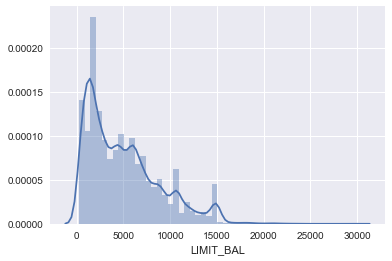

In [8]:
sns.distplot(train['LIMIT_BAL'])

In [9]:
print("Number of null values: {0}".format(train['LIMIT_BAL'].isnull().sum()))

Number of null values: 0


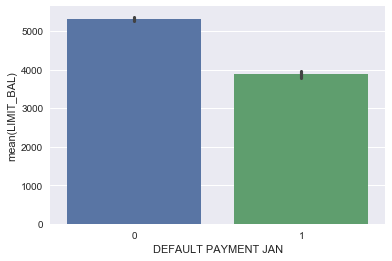

In [10]:
sns.barplot(x='DEFAULT PAYMENT JAN', y='LIMIT_BAL', data=train)

If the balance is higher, there is lower probability to default. That seems reasonable

# SEX

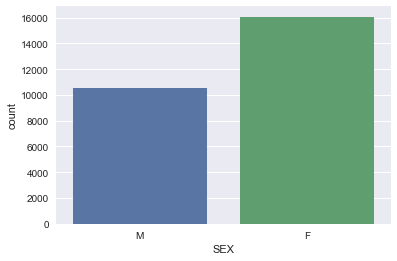

In [11]:
sns.countplot(x='SEX', data=train)

There are more females than males

In [12]:
males = (train['SEX'] == 'M').sum()
females = (train['SEX'] == 'F').sum()
sex_nulls = (train['SEX'].isnull()).sum()

print("Number of males: {0}".format(males))
print("Number of females: {0}".format(females))
print("Number of nulls: {0}".format(sex_nulls))

print("\nSum: {0} / {1}".format(males + females + sex_nulls, len(train)))

Number of males: 10555
Number of females: 16071
Number of nulls: 258

Sum: 26884 / 26884


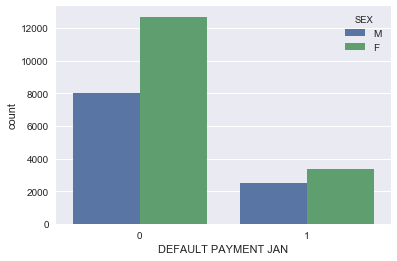

In [13]:
sns.countplot(x='DEFAULT PAYMENT JAN', hue='SEX', data=train)

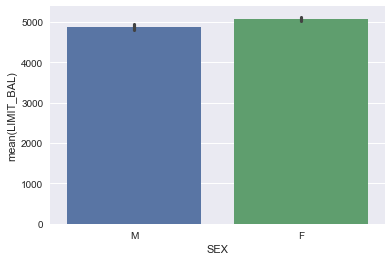

In [14]:
sns.barplot(x = 'SEX', y = 'LIMIT_BAL', data=train)

Males and females have quite the same initial balance

In [15]:
pd.crosstab(train['SEX'], train['DEFAULT PAYMENT JAN'], normalize=0)

DEFAULT PAYMENT JAN,0,1
SEX,,
F,0.790119,0.209881
M,0.761440,0.238560


Females have ~21% probability to default, while males have a slightly higher probability to default (~24%)

# EDUCATION

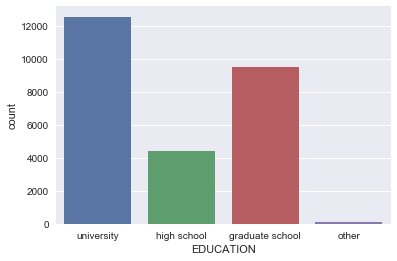

In [16]:
sns.countplot(x='EDUCATION', data=train)

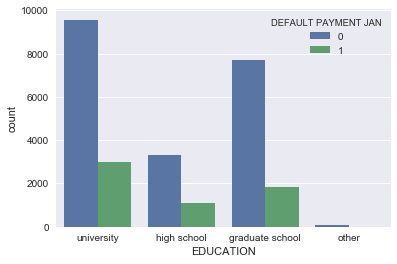

In [17]:
sns.countplot(x = 'EDUCATION', hue='DEFAULT PAYMENT JAN', data=train)

In [18]:
pd.crosstab(train['EDUCATION'], train['DEFAULT PAYMENT JAN'], normalize=0)

DEFAULT PAYMENT JAN,0,1
EDUCATION,,
graduate school,0.808036,0.191964
high school,0.749546,0.250454
other,0.936937,0.063063
university,0.762057,0.237943


In [19]:
pd.crosstab(train['EDUCATION'], train['DEFAULT PAYMENT JAN'])

DEFAULT PAYMENT JAN,0,1
EDUCATION,,
graduate school,7682,1825
high school,3304,1104
other,104,7
university,9560,2985


There is no high correlation between having an education and go in default. Those with 'other' education may be outliers.

Note in fact that the baseline is 80% - 20%

In [20]:
print ("Num of missing values: {0}".format((train['EDUCATION'].isnull()).sum()))

Num of missing values: 313


Ugh there are some missing values...

# MARRIAGE

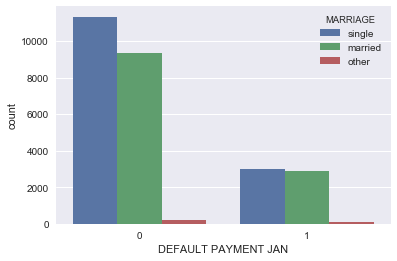

In [21]:
sns.countplot(x = 'DEFAULT PAYMENT JAN', hue = 'MARRIAGE', data=train)

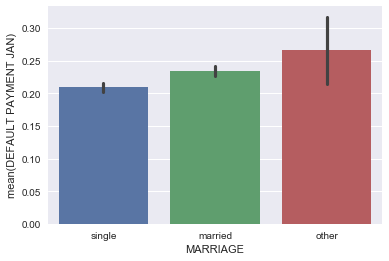

In [22]:
sns.barplot(y = 'DEFAULT PAYMENT JAN', x = 'MARRIAGE', data=train)

Singles have slightly higher probability of not being insolvent than married ones.

In [23]:
print("Number of missing values: {0}".format(train['MARRIAGE'].isnull().sum()))

Number of missing values: 50


# BIRTHDATE

Instead of bithdate consider the age (in years)

In [24]:
birthdates = train['BIRTH_DATE']

In [25]:
print("Number of missing values: {0}".format(birthdates.isnull().sum()))

Number of missing values: 702


In [26]:
import datetime
def get_age(date):
    try:
        return (datetime.datetime.today() - datetime.datetime.strptime(date, '%d/%m/%Y')).days//365
    except Exception as e:
        return date

birthdates = birthdates.apply(get_age)

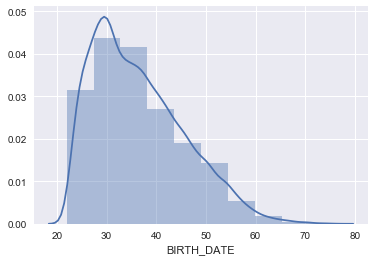

In [27]:
sns.distplot(birthdates[~birthdates.isnull()], bins=10)

In [28]:
train['AGE'] = birthdates

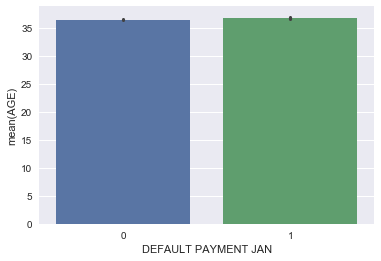

In [29]:
sns.barplot(x = 'DEFAULT PAYMENT JAN', y = 'AGE', data=train)

There is no significant difference of age between insolvents and non insolvents

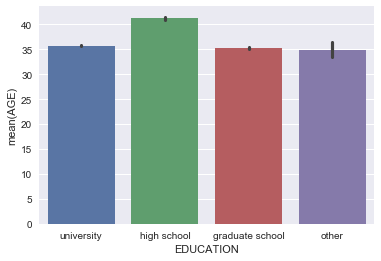

In [30]:
sns.barplot(x = 'EDUCATION', y = 'AGE', data=train)

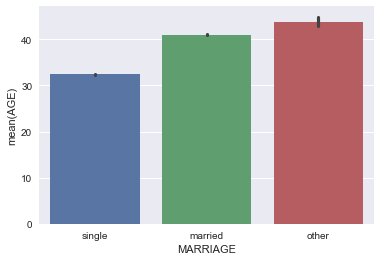

In [31]:
sns.barplot(x = 'MARRIAGE', y = 'AGE', data=train)

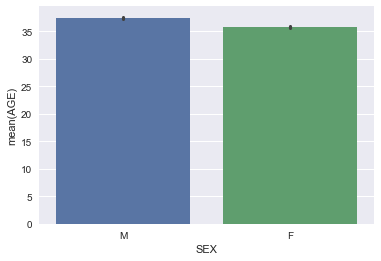

In [32]:
sns.barplot(x = 'SEX', y = 'AGE', data=train)

# PAY_*

In [33]:
def aggregate_payment(x):
    return x['PAY_DEC'] + x['PAY_OCT'] + x['PAY_NOV'] + x['PAY_AUG'] + x['PAY_SEP'] + x['PAY_JUL']

def aggregate_payment_normalized(x):
    cols = ['PAY_JUL', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC']
    ret = 0
    for c in cols:
        if x[c] > 0:
            ret += 1
        elif x[c] < 0:
            ret -= 1
    return ret
            
train['PAY_SUM'] = train.apply(aggregate_payment, axis=1)
train['PAY_SUM_NORM'] = train.apply(aggregate_payment_normalized, axis=1)

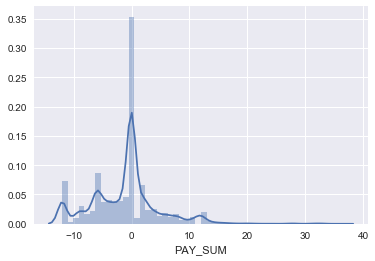

In [34]:
sns.distplot(train['PAY_SUM'])

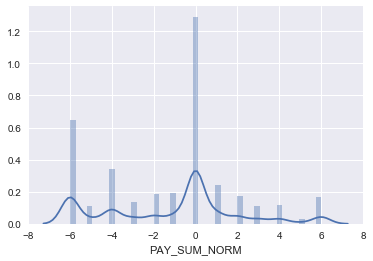

In [35]:
sns.distplot(train['PAY_SUM_NORM'])

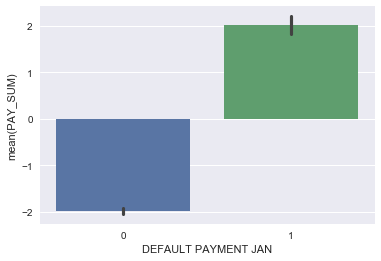

In [36]:
sns.barplot(y='PAY_SUM', x='DEFAULT PAYMENT JAN', data=train)

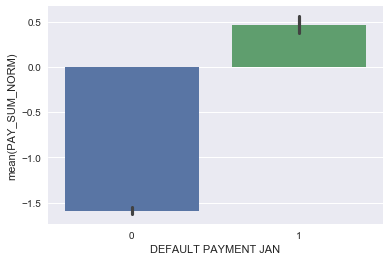

In [37]:
sns.barplot(y='PAY_SUM_NORM', x='DEFAULT PAYMENT JAN', data=train)

In [38]:
def predict_default(pay_sum):
    if pay_sum > 0:
        return 1
    return 0

prediction = train['PAY_SUM'].apply(predict_default)
prediction_norm = train['PAY_SUM_NORM'].apply(predict_default)

In [39]:
from sklearn.metrics import accuracy_score
pay_sum_acc = accuracy_score(prediction, train['DEFAULT PAYMENT JAN'])
pay_sum_acc_norm = accuracy_score(prediction_norm, train['DEFAULT PAYMENT JAN'])

print ("Accuracy for sum: {0}\nAccuracy for sum normalized: {1}".format(pay_sum_acc, pay_sum_acc_norm))

Accuracy for sum: 0.772132123195953
Accuracy for sum normalized: 0.7759262014581163


In [40]:
def has_paid_most_times(x):
    if x == 0:
        return 'PAY REGULAR'
    if x > 0:
        return 'PAY LATE'
    if x < 0:
        return 'PAY EARLY'

train['PAYER_TYPE'] = train['PAY_SUM_NORM'].apply(has_paid_most_times)

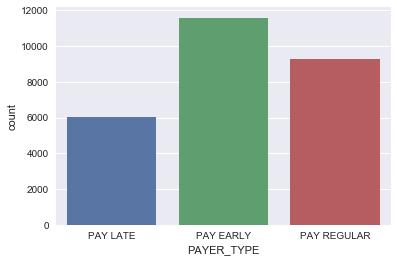

In [41]:
sns.countplot(x = 'PAYER_TYPE', data = train)

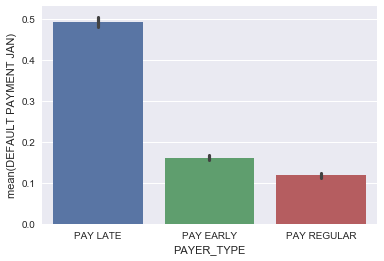

In [42]:
sns.barplot(y = 'DEFAULT PAYMENT JAN', x = 'PAYER_TYPE', data = train)

It is reasonable that the ones that have paid late most of the times has a higher chance of becoming insolvent in January

**TODO** Try to give some weights, since the payments in Dec and Nov are more meaningful than the ones in Jul. Maybe check the first derivative of the series.

In [43]:
def avg_payments(columns):
    def ret(x):
        retval = 0
        for c in columns:
            retval += x[c]
        return retval / len(columns)
    return ret

def aggregate_last_payments(x):
    #return (x['PAY_DEC'] + x['PAY_OCT'] + x['PAY_NOV'])/3
    return avg_payments(['PAY_DEC', 'PAY_OCT', 'PAY_NOV'])
def aggregate_first_payments(x):
    return (x['PAY_JUL'] + x['PAY_AUG'] + x['PAY_SEP'])/3
def aggregate_avg_payments(x):
    return (x['PAY_JUL'] + x['PAY_AUG'] + x['PAY_SEP'] + x['PAY_DEC'] + x['PAY_OCT'] + x['PAY_NOV'])/6

train['PAY_LAST_3'] = train.apply(avg_payments(['PAY_DEC', 'PAY_OCT', 'PAY_NOV']), axis=1)
train['PAY_FIRST_3'] = train.apply(avg_payments(['PAY_JUL', 'PAY_AUG', 'PAY_SEP']), axis=1)
train['PAY_AVG'] = train.apply(avg_payments(['PAY_JUL', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC']), axis=1)

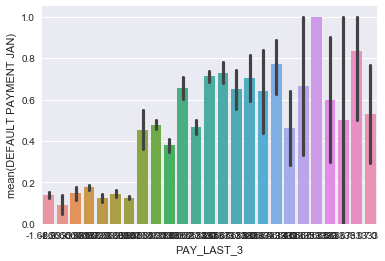

In [44]:
sns.barplot(y = 'DEFAULT PAYMENT JAN', x = 'PAY_LAST_3', data=train)

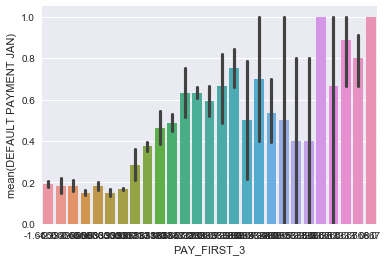

In [45]:
sns.barplot(y = 'DEFAULT PAYMENT JAN', x = 'PAY_FIRST_3', data=train)

In [46]:
train['PAY_LAST_3_CAT'] = pd.qcut(train['PAY_LAST_3'], q=3, labels=['PAY_EARLY', 'PAY_REG', 'PAY_LATE'])
train['PAY_FIRST_3_CAT'] = pd.qcut(train['PAY_FIRST_3'], q=3, labels=['PAY_EARLY', 'PAY_REG', 'PAY_LATE'])
train['PAY_AVG_CAT'] = pd.qcut(train['PAY_AVG'], q=3, labels=['PAY_EARLY', 'PAY_REG', 'PAY_LATE'])

In [47]:
pd.crosstab(train['DEFAULT PAYMENT JAN'], [train['PAY_AVG_CAT'], train['PAY_LAST_3_CAT']], normalize=1)

PAY_AVG_CAT         PAY_EARLY                       PAY_REG            \
PAY_LAST_3_CAT      PAY_EARLY   PAY_REG  PAY_LATE PAY_EARLY   PAY_REG   
DEFAULT PAYMENT JAN                                                     
0                    0.844027  0.826793  0.433735   0.87169  0.888612   
1                    0.155973  0.173207  0.566265   0.12831  0.111388   

PAY_AVG_CAT                    PAY_LATE                      
PAY_LAST_3_CAT       PAY_LATE PAY_EARLY   PAY_REG  PAY_LATE  
DEFAULT PAYMENT JAN                                          
0                    0.605263  0.730337  0.771357  0.450594  
1                    0.394737  0.269663  0.228643  0.549406

In [48]:
train.groupby(['PAY_FIRST_3_CAT', 'PAY_LAST_3_CAT', 'PAY_AVG_CAT'])['DEFAULT PAYMENT JAN'].count().unstack()

PAY_AVG_CAT                     PAY_EARLY  PAY_REG  PAY_LATE
PAY_FIRST_3_CAT PAY_LAST_3_CAT                              
PAY_EARLY       PAY_EARLY          7429.0      NaN       NaN
                PAY_REG             739.0    520.0       NaN
                PAY_LATE             83.0    252.0     128.0
PAY_REG         PAY_EARLY           908.0    851.0       NaN
                PAY_REG               NaN   9526.0       NaN
                PAY_LATE              NaN     14.0    2109.0
PAY_LATE        PAY_EARLY            17.0    131.0      89.0
                PAY_REG               NaN      NaN    1194.0
                PAY_LATE              NaN      NaN    2894.0

In [49]:
train.groupby(['PAY_FIRST_3_CAT', 'PAY_LAST_3_CAT', 'PAY_AVG_CAT'])['DEFAULT PAYMENT JAN'].mean().unstack()

PAY_AVG_CAT                     PAY_EARLY   PAY_REG  PAY_LATE
PAY_FIRST_3_CAT PAY_LAST_3_CAT                               
PAY_EARLY       PAY_EARLY        0.160048       NaN       NaN
                PAY_REG          0.173207  0.165385       NaN
                PAY_LATE         0.566265  0.388889  0.515625
PAY_REG         PAY_EARLY        0.117841  0.105758       NaN
                PAY_REG               NaN  0.108440       NaN
                PAY_LATE              NaN  0.500000  0.465149
PAY_LATE        PAY_EARLY        0.411765  0.274809  0.269663
                PAY_REG               NaN       NaN  0.228643
                PAY_LATE              NaN       NaN  0.612301

In [50]:
x = pd.qcut(train['PAY_LAST_3'], q=3)
pd.crosstab(train['DEFAULT PAYMENT JAN'], x, normalize=1)

PAY_LAST_3,"[-2, -0.333]","(-0.333, 0]","(0, 7]"
DEFAULT PAYMENT JAN,,,
0,0.845836,0.873111,0.457847
1,0.154164,0.126889,0.542153


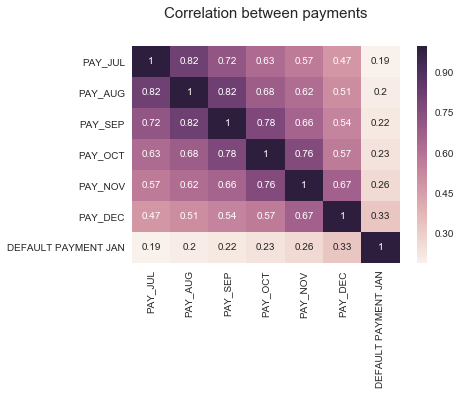

In [51]:
plt.title('Correlation between payments', size=15, y=1.1)
sns.heatmap(train.loc[:, ['PAY_JUL', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC', 'DEFAULT PAYMENT JAN']].corr(), annot=True)

We can observe that the payment in December is the most correlated with a default in January, as we can expect

In [52]:
def get_trend(y):
    N = len(y)
    x = range(N)
    B = (sum(x[i] * y[i] for i in range(N)) - 1./N*sum(x)*sum(y)) / (sum(x[i]**2 for i in range(N)) - 1./N*sum(x)**2)
    return B


In [53]:
cols = ['PAY_JUL', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC']
def get_payments(x):
    return [v for v in x.loc[cols]]

def get_trend_from_payments(row):
    return get_trend(get_payments(row))
    

In [54]:
res = train.apply(get_trend_from_payments, axis=1)

0.885714285714


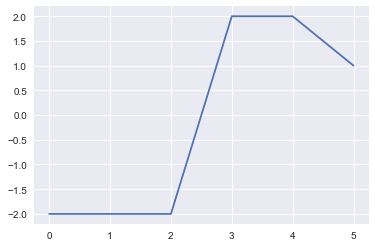

In [55]:
customer = 64

payments = get_payments(train.loc[customer, :])
trend = get_trend(payments)

plt.plot(range(6), payments)
print(trend)

In [56]:
train['PAY_TREND'] = res
train['PAY_TREND_CAT'] = pd.qcut(train['PAY_TREND'], q = 2, labels=['DEC', 'INC'])

train.groupby(['PAY_TREND_CAT', 'PAY_AVG_CAT'])['DEFAULT PAYMENT JAN'].mean().unstack()

PAY_AVG_CAT,PAY_EARLY,PAY_REG,PAY_LATE
PAY_TREND_CAT,,,
DEC,0.133381,0.109874,0.451956
INC,0.204298,0.182545,0.514000


In [57]:
def aggregate_payment_weight(x):
    cols = ['PAY_JUL', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC']
    weights = [1, 2, 3, 4, 5, 6]
    ret = 0
    for c,w in zip(cols, weights):
        ret += x[c]*w
    return ret

In [58]:
train['PAY_LAST_2_CAT'] = pd.qcut(train.apply(avg_payments(['PAY_DEC', 'PAY_NOV']), axis=1), q=2, labels=['EARLY', 'LATE'])

In [59]:
train.groupby(['PAY_LAST_2_CAT', 'PAY_DEC'])['DEFAULT PAYMENT JAN'].count().unstack()

PAY_DEC,-2,-1,0,1,2,3,4,5,6,7,8
PAY_LAST_2_CAT,,,,,,,,,,,
EARLY,2478.0,4697.0,13184.0,1644.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LATE,NaN,400.0,NaN,1665.0,2399.0,291.0,70.0,23.0,10.0,6.0,17.0


# BILL AMT *

In [60]:
bill_cols = ['BILL_AMT_JUL', 'BILL_AMT_AUG', 'BILL_AMT_SEP', 'BILL_AMT_OCT', 'BILL_AMT_NOV', 'BILL_AMT_DEC']

In [61]:
def aggregate_bills(x):
    return sum([x[c] for c in bill_cols])


In [62]:
train['BILL_SUM'] = train.apply(aggregate_bills, axis=1)

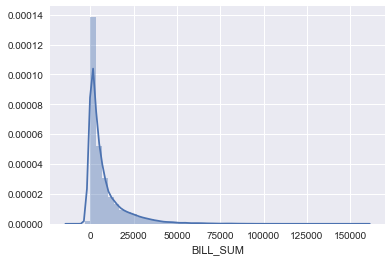

In [63]:
sns.distplot(train['BILL_SUM'])

In [64]:
train.loc[:, bill_cols + ['DEFAULT PAYMENT JAN']].corr()

,BILL_AMT_JUL,BILL_AMT_AUG,BILL_AMT_SEP,BILL_AMT_OCT,BILL_AMT_NOV,BILL_AMT_DEC,DEFAULT PAYMENT JAN
BILL_AMT_JUL,1.000000,0.944904,0.900106,0.854035,0.832461,0.803671,-0.008389
BILL_AMT_AUG,0.944904,1.000000,0.938963,0.884777,0.859968,0.830410,-0.009064
BILL_AMT_SEP,0.900106,0.938963,1.000000,0.925838,0.893716,0.861580,-0.011693
BILL_AMT_OCT,0.854035,0.884777,0.925838,1.000000,0.929516,0.892775,-0.014879
BILL_AMT_NOV,0.832461,0.859968,0.893716,0.929516,1.000000,0.951679,-0.013641
BILL_AMT_DEC,0.803671,0.830410,0.861580,0.892775,0.951679,1.000000,-0.018926
DEFAULT PAYMENT JAN,-0.008389,-0.009064,-0.011693,-0.014879,-0.013641,-0.018926,1.000000


In [65]:
customer = 35
bills = train.loc[customer, bill_cols]
bills

BILL_AMT_JUL          0
BILL_AMT_AUG    462.856
BILL_AMT_SEP    450.006
BILL_AMT_OCT    459.994
BILL_AMT_NOV    429.852
BILL_AMT_DEC     411.01
Name: 35, dtype: object

# PAY AMT

In [66]:
pay_amt_cols = ['PAY_AMT_JUL', 'PAY_AMT_AUG', 'PAY_AMT_SEP', 'PAY_AMT_OCT', 'PAY_AMT_NOV', 'PAY_AMT_DEC']

In [67]:
def aggregate_payment_amt(x):
    return sum([x[c] for c in pay_amt_cols])

In [68]:
train['PAY_AMT_SUM'] = train.apply(aggregate_payment_amt, axis=1)

In [69]:
train['PAY_AMT_SUM'].describe()

count     26884.000000
mean        950.194554
std        1842.985628
min           0.000000
25%         199.803294
50%         430.582918
75%        1001.908388
max      112220.358100
Name: PAY_AMT_SUM, dtype: float64

In [70]:
train.loc[:, pay_amt_cols + ['DEFAULT PAYMENT JAN']].corr()

,PAY_AMT_JUL,PAY_AMT_AUG,PAY_AMT_SEP,PAY_AMT_OCT,PAY_AMT_NOV,PAY_AMT_DEC,DEFAULT PAYMENT JAN
PAY_AMT_JUL,1.000000,0.158806,0.160183,0.164051,0.165197,0.184515,-0.051564
PAY_AMT_AUG,0.158806,1.000000,0.147344,0.158695,0.178662,0.146172,-0.055395
PAY_AMT_SEP,0.160183,0.147344,1.000000,0.227557,0.193831,0.211294,-0.057521
PAY_AMT_OCT,0.164051,0.158695,0.227557,1.000000,0.262045,0.263506,-0.057172
PAY_AMT_NOV,0.165197,0.178662,0.193831,0.262045,1.000000,0.308484,-0.061103
PAY_AMT_DEC,0.184515,0.146172,0.211294,0.263506,0.308484,1.000000,-0.073131
DEFAULT PAYMENT JAN,-0.051564,-0.055395,-0.057521,-0.057172,-0.061103,-0.073131,1.000000


In [71]:
#1831
customer = 1832

train.loc[customer, :]

CUST_COD                  31563822
LIMIT_BAL                  5962.72
SEX                              F
EDUCATION              high school
MARRIAGE                    single
BIRTH_DATE              16/01/1991
PAY_DEC                         -1
PAY_NOV                         -1
PAY_OCT                         -1
PAY_SEP                          0
PAY_AUG                         -1
PAY_JUL                         -1
BILL_AMT_DEC               49.9676
BILL_AMT_NOV               93.0781
BILL_AMT_OCT               89.1725
BILL_AMT_SEP               11.6273
BILL_AMT_AUG               36.1043
BILL_AMT_JUL               11.6273
PAY_AMT_DEC                136.993
PAY_AMT_NOV                89.1725
PAY_AMT_OCT                      0
PAY_AMT_SEP                36.1043
PAY_AMT_AUG                11.6273
PAY_AMT_JUL                33.1527
DEFAULT PAYMENT JAN              0
AGE                             26
PAY_SUM                         -5
PAY_SUM_NORM                    -5
PAYER_TYPE          

In [72]:
def get_trend_from_bills(x):
    return get_trend([x[c] for c in bill_cols])

train['BILL_TREND'] = train.apply(get_trend_from_bills, axis=1)

Default payment: 0, BILL_TREND: 112.22690857142858


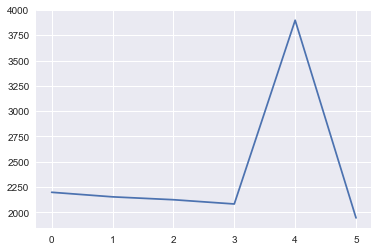

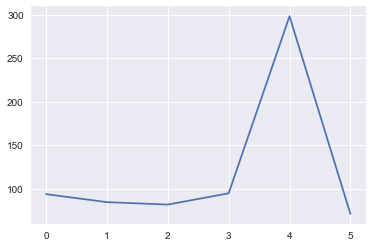

In [73]:
customer = train.sample()
customer = customer.index.item()

bills = train.loc[customer, bill_cols]
pay_amts = train.loc[customer, pay_amt_cols]

print("Default payment: {0}, BILL_TREND: {1}".format(train.loc[customer, 'DEFAULT PAYMENT JAN'], train.loc[customer, 'BILL_TREND']))
plt.plot(range(6), bills)
plt.show()
plt.plot(range(6), pay_amts)


# ANALYZE TEST DATA

In [74]:
with open('data/test.csv') as f:
    clean_file = [line for line in map(lambda s: s.strip().replace('"', ''), f.readlines()) if line != '']

with open('data/test_clean.csv', 'w') as f:
    f.write('\n'.join(clean_file))

In [75]:
test = pd.read_csv('data/test_clean.csv', sep=';')

In [76]:
test.head()

,CUST_COD,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,BIRTH_DATE,PAY_DEC,PAY_NOV,PAY_OCT,PAY_SEP,...,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,PAY_AMT_DEC,PAY_AMT_NOV,PAY_AMT_OCT,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,DEFAULT PAYMENT JAN
0,70696449,13117.984,M,graduate school,married,1985-01-05T00:05:00,-1,0,0,0,...,394.940759,225.897647,49.252067,149.753713,90.156326,31.095585,90.543903,49.490576,10.881964,NaN
1,76505586,596.272,M,university,single,1980-01-13T00:11:00,0,0,0,2,...,582.349049,594.125421,587.178852,38.757680,98.384880,0.000000,29.813600,29.813600,26.832240,NaN
2,88442515,1490.680,F,university,married,1982-01-10T00:04:00,0,0,0,0,...,445.683506,493.921911,501.643634,36.402406,59.627200,44.720400,59.627200,59.627200,119.254400,NaN
3,73457138,5962.720,F,graduate school,single,1989-01-17T00:10:00,-1,-1,-1,0,...,126.469291,121.758742,221.038030,19.826044,28.621056,116.511549,30.230990,104.347600,85.863168,NaN
4,68367768,5366.448,M,university,single,1975-01-13T00:09:00,-2,-2,-2,-2,...,0.000000,0.000000,0.000000,26.832240,27.130376,0.000000,0.000000,0.000000,0.000000,NaN


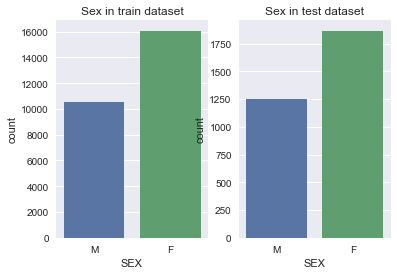

In [77]:
plt.subplot(1, 2, 1)
plt.title("Sex in train dataset")
sns.countplot(x = 'SEX', data=train)
plt.subplot(1, 2, 2)
plt.title("Sex in test dataset")
sns.countplot(x = 'SEX', data=test)

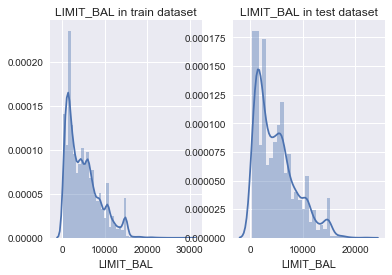

In [78]:
plt.subplot(1, 2, 1)
plt.title("LIMIT_BAL in train dataset")
sns.distplot(train['LIMIT_BAL'])
plt.subplot(1, 2, 2)
plt.title("LIMIT_BAL in test dataset")
sns.distplot(test['LIMIT_BAL'])

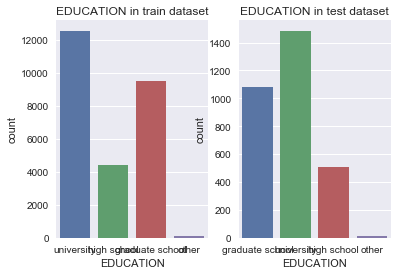

In [79]:
plt.subplot(1, 2, 1)
plt.title("EDUCATION in train dataset")
sns.countplot(x = 'EDUCATION', data=train)
plt.subplot(1, 2, 2)
plt.title("EDUCATION in test dataset")
sns.countplot(x = 'EDUCATION', data=test)

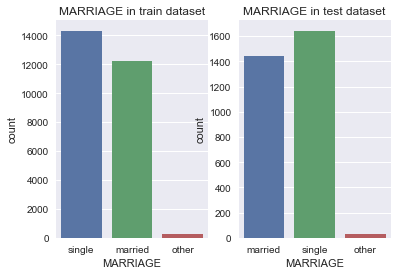

In [80]:
plt.subplot(1, 2, 1)
plt.title("MARRIAGE in train dataset")
sns.countplot(x = 'MARRIAGE', data=train)
plt.subplot(1, 2, 2)
plt.title("MARRIAGE in test dataset")
sns.countplot(x = 'MARRIAGE', data=test)

In [81]:
test['AGE'] = train['BIRTH_DATE'].apply(get_age)

## Missing values

In [82]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116 entries, 0 to 3115
Data columns (total 26 columns):
CUST_COD               3116 non-null int64
LIMIT_BAL              3116 non-null float64
SEX                    3113 non-null object
EDUCATION              3084 non-null object
MARRIAGE               3112 non-null object
BIRTH_DATE             3113 non-null object
PAY_DEC                3116 non-null int64
PAY_NOV                3116 non-null int64
PAY_OCT                3116 non-null int64
PAY_SEP                3116 non-null int64
PAY_AUG                3116 non-null int64
PAY_JUL                3116 non-null int64
BILL_AMT_DEC           3116 non-null float64
BILL_AMT_NOV           3116 non-null float64
BILL_AMT_OCT           3116 non-null float64
BILL_AMT_SEP           3116 non-null float64
BILL_AMT_AUG           3116 non-null float64
BILL_AMT_JUL           3116 non-null float64
PAY_AMT_DEC            3116 non-null float64
PAY_AMT_NOV            3116 non-null float64
PAY_AMT_OCT

There are overall less missing values than in the train set. 

The columns affected by missing values are: 
- SEX (3) 
- EDUCATION (32)
- MARRIAGE (4) 
- BIRTH_DATE (3)

In [83]:
#1743
#3643


In [84]:
train.sample().unstack()

CUST_COD             23160      36919196
LIMIT_BAL            23160       1490.68
SEX                  23160             F
EDUCATION            23160    university
MARRIAGE             23160       married
BIRTH_DATE           23160    01/01/1975
PAY_DEC              23160             2
PAY_NOV              23160             3
PAY_OCT              23160             2
PAY_SEP              23160             2
PAY_AUG              23160             2
PAY_JUL              23160             2
BILL_AMT_DEC         23160       878.398
BILL_AMT_NOV         23160       856.098
BILL_AMT_OCT         23160       863.104
BILL_AMT_SEP         23160       884.987
BILL_AMT_AUG         23160        866.92
BILL_AMT_JUL         23160       892.738
PAY_AMT_DEC          23160             0
PAY_AMT_NOV          23160       29.8136
PAY_AMT_OCT          23160       44.7204
PAY_AMT_SEP          23160             0
PAY_AMT_AUG          23160       44.7204
PAY_AMT_JUL          23160       62.6086
DEFAULT PAYMENT 

In [85]:
train.loc[7967,:]

CUST_COD                  18258166
LIMIT_BAL                  1490.68
SEX                              M
EDUCATION               university
MARRIAGE                   married
BIRTH_DATE              01/01/1983
PAY_DEC                          0
PAY_NOV                          0
PAY_OCT                          0
PAY_SEP                          0
PAY_AUG                          0
PAY_JUL                          0
BILL_AMT_DEC               1402.67
BILL_AMT_NOV               717.256
BILL_AMT_OCT               746.592
BILL_AMT_SEP               654.319
BILL_AMT_AUG               572.361
BILL_AMT_JUL               584.645
PAY_AMT_DEC                43.0807
PAY_AMT_NOV                42.6036
PAY_AMT_OCT                38.5788
PAY_AMT_SEP                29.8136
PAY_AMT_AUG                21.0186
PAY_AMT_JUL                20.8397
DEFAULT PAYMENT JAN              0
AGE                             34
PAY_SUM                          0
PAY_SUM_NORM                     0
PAYER_TYPE          

In [86]:
train.loc[(train['PAY_SEP'] == -2) & (train['BILL_AMT_SEP'] != 0),:].sample().unstack()

CUST_COD             13396           22498343
LIMIT_BAL            13396            10732.9
SEX                  13396                  F
EDUCATION            13396    graduate school
MARRIAGE             13396            married
BIRTH_DATE           13396         18/01/1968
PAY_DEC              13396                 -2
PAY_NOV              13396                 -2
PAY_OCT              13396                 -2
PAY_SEP              13396                 -2
PAY_AUG              13396                 -1
PAY_JUL              13396                 -1
BILL_AMT_DEC         13396             63.175
BILL_AMT_NOV         13396         -0.0894408
BILL_AMT_OCT         13396         -0.0894408
BILL_AMT_SEP         13396         -0.0894408
BILL_AMT_AUG         13396            21.1975
BILL_AMT_JUL         13396            26.0869
PAY_AMT_DEC          13396          0.0894408
PAY_AMT_NOV          13396                  0
PAY_AMT_OCT          13396                  0
PAY_AMT_SEP          13396        

# Missing values analysis

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26884 entries, 0 to 26883
Data columns (total 41 columns):
CUST_COD               26884 non-null int64
LIMIT_BAL              26884 non-null float64
SEX                    26626 non-null object
EDUCATION              26571 non-null object
MARRIAGE               26834 non-null object
BIRTH_DATE             26182 non-null object
PAY_DEC                26884 non-null int64
PAY_NOV                26884 non-null int64
PAY_OCT                26884 non-null int64
PAY_SEP                26884 non-null int64
PAY_AUG                26884 non-null int64
PAY_JUL                26884 non-null int64
BILL_AMT_DEC           26884 non-null float64
BILL_AMT_NOV           26884 non-null float64
BILL_AMT_OCT           26884 non-null float64
BILL_AMT_SEP           26884 non-null float64
BILL_AMT_AUG           26884 non-null float64
BILL_AMT_JUL           26884 non-null float64
PAY_AMT_DEC            26884 non-null float64
PAY_AMT_NOV            26884 non-nu

## SEX

In [88]:
missing_values_sex = train[train['SEX'].isnull()]

In [89]:
len(missing_values_sex)

258

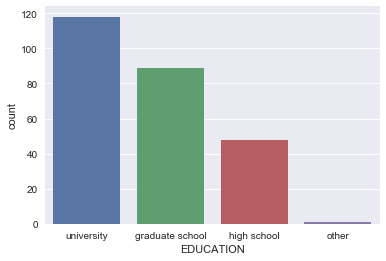

In [90]:
sns.countplot(x = 'EDUCATION', data = missing_values_sex)

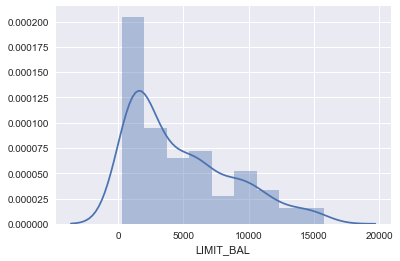

In [91]:
sns.distplot(missing_values_sex['LIMIT_BAL'])

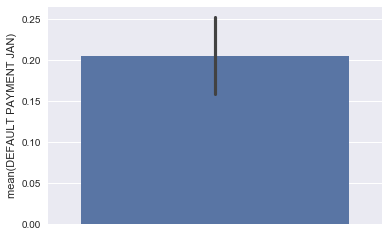

In [92]:
sns.barplot(y = 'DEFAULT PAYMENT JAN', data = missing_values_sex)

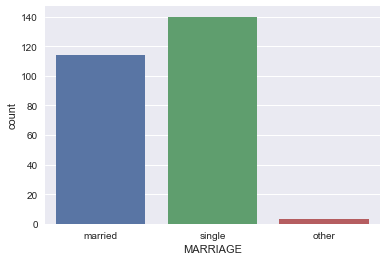

In [93]:
sns.countplot(x = 'MARRIAGE', data=missing_values_sex)

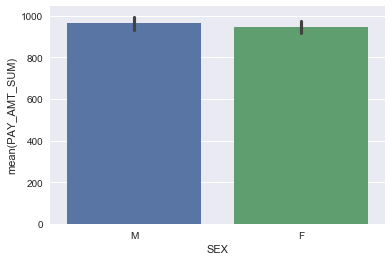

In [94]:
sns.barplot(y = 'PAY_AMT_SUM', x='SEX', data=train)

In [96]:
pd.crosstab(train['SEX'], [train['MARRIAGE'], train['EDUCATION']], normalize=1)

MARRIAGE          married                                            other  \
EDUCATION graduate school high school     other university graduate school   
SEX                                                                          
F                0.545042    0.635248  0.673913   0.654905        0.358974   
M                0.454958    0.364752  0.326087   0.345095        0.641026   

MARRIAGE                                        single                        \
EDUCATION high school other university graduate school high school     other   
SEX                                                                            
F            0.653061   1.0    0.59589        0.612063    0.525633  0.693548   
M            0.346939   0.0    0.40411        0.387937    0.474367  0.306452   

MARRIAGE              
EDUCATION university  
SEX                   
F           0.581643  
M           0.418357

In [102]:
train.sample().unstack()

CUST_COD             25805       34482980
LIMIT_BAL            25805        1490.68
SEX                  25805              F
EDUCATION            25805     university
MARRIAGE             25805        married
BIRTH_DATE           25805     18/01/1985
PAY_DEC              25805              0
PAY_NOV              25805              0
PAY_OCT              25805              0
PAY_SEP              25805              0
PAY_AUG              25805              0
PAY_JUL              25805              0
BILL_AMT_DEC         25805        1572.79
BILL_AMT_NOV         25805         1502.4
BILL_AMT_OCT         25805        773.752
BILL_AMT_SEP         25805        815.402
BILL_AMT_AUG         25805        594.215
BILL_AMT_JUL         25805         502.21
PAY_AMT_DEC          25805        89.4408
PAY_AMT_NOV          25805        149.068
PAY_AMT_OCT          25805        89.4408
PAY_AMT_SEP          25805        89.5004
PAY_AMT_AUG          25805        89.6495
PAY_AMT_JUL          25805        

In [22]:
train = pd.read_csv('data/train_with_additional_features.csv', index_col=0)

In [20]:
bill_ord = pd.read_csv('bills_order.csv', index_col=0)

In [32]:
df = pd.concat([train, bill_ord], axis=1)

In [30]:
bill_ord.index = train.index

In [19]:
pd.read_csv?

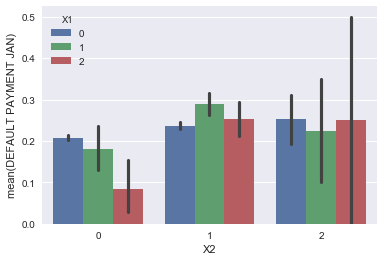

In [46]:
sns.barplot(x = 'X2', y='DEFAULT PAYMENT JAN', hue = 'X1', data=df)

In [48]:
from scipy.stats import skew, kurtosis

In [49]:
pay_amt_ord = pd.read_csv('pay_amt_orders.csv', index_col=0)

In [53]:
df2 = pd.concat([train, pay_amt_ord], axis=1)

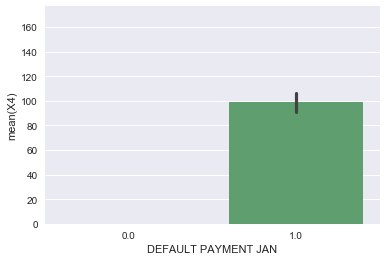

In [59]:
sns.barplot(x='DEFAULT PAYMENT JAN', y = 'X4',  data=df2)

In [60]:
from sklearn.ensemble import RandomForestClassifier